In [1]:
'''
Multiple Linear Regression is generalization of simple linear regression 
that regresses a continuous response variable onto multiple features.

Recall SLR of pizza price to diameter. However, number of toppings will
also affect price as the second explanatory variable.  This means SLR
is not a sufficient method, so MLR is used. Given by this model:
y = alpha + (beta_1)(x_1) + (beta_2)(x_2) + ... + (beta_n)(x_n)
Each explanatory variable (x) has its own coefficient (beta)
Can also be written  as a vectorization of SLR: Y = (X)x(Beta)

Parameters - coefficients for the features and intercept
Dividing by matrix = multiplying by inverse of matrix
 to yield a square matrix
'''
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [3]:
# Numpy provides a least squares function to do this more compactly
from numpy.linalg import lstsq

print(lstsq(X, y)[0])

/home/will/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [2]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2], [9,0], [11,2], [16,2], [12,0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


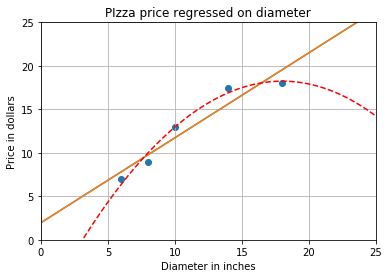

X_train: 
 [[6], [8], [10], [14], [18]]
X_train_quadratic: 
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
X_test: 
 [[6], [8], [11], [16]]
X-test_quadratic: 
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared:  0.809726797707665
Quadratic regression r-squared:  0.8675443656345054


In [4]:
'''
POLYNOMIAL REGRESSION
Models a linear relationship between the response variable and polynomial features.
Curvilinear relationships are captured by transforming the features and fitting them
to a line similar to linear regression. This example only uses one explanitory variable.

Quadratic regression, or regression with a second order polynomial, is given by the
equation : y = alpha + (beta_1)(x) + (beta_2)(x^2)
Only one feature is used in quadratic regression, but the equation now has three terms
instead of two. Polynomial features transformer can be used to add polynomial features
to a feature representation.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define Training and Testing Data
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

# Instantiate regression model and fit data on train data
# Then predict and plot data using regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

# Do the same as above with polynomial features
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

# Plot the data
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('PIzza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print('X_train: \n', X_train)
print('X_train_quadratic: \n', X_train_quadratic)
print('X_test: \n', X_test)
print('X-test_quadratic: \n', X_test_quadratic)
print('Simple linear regression r-squared: ', regressor.score(X_test, y_test))
print('Quadratic regression r-squared: ', regressor_quadratic.score(X_test_quadratic, y_test))

In [5]:
'''
REGULARIZATION: a collection of techniqures to prevent overfitting
Adds information in the form of penalty, often against overcomplification.
In essence, it tries to find the simplest model which fits the data.

Ridge Regression (AKA Tikhonov Regularization) penalizes large model parameters.
Modifies RSS cost function by adding the L2 norm of the coefficients shown here:

https://www.quora.com/In-regression-what-are-some-common-alternatives-to-using-residual-sum
-of-squares-RSS-as-your-cost-function-Can-you-describe-the-differences

Lamda controls the strength of the penalty. Lamda = 0 menas ridge regression is equal to
linear regression.

SciKit-Learn also provides Absulute Shrinkage and Selection Operator which
penalizes the coefficients by adding L1 norm to cost function

SciKit-Learn also provides an implementation of Elastic Net Regularization
which combines the L1 and L2 penalties used by LASSO and Ridge regularization.
'''

'\nREGULARIZATION: a collection of techniqures to prevent overfitting\nAdds information in the form of penalty, often against overcomplification.\nIn essence, it tries to find the simplest model which fits the data.\n\nRidge Regression (AKA Tikhonov Regularization) penalizes large model parameters.\nModifies RSS cost function by adding the L2 norm of the coefficients shown here:\n\nhttps://www.quora.com/In-regression-what-are-some-common-alternatives-to-using-residual-sum\n-of-squares-RSS-as-your-cost-function-Can-you-describe-the-differences\n\nLamda controls the strength of the penalty. Lamda = 0 menas ridge regression is equal to\nlinear regression.\n\nSciKit-Learn also provides Absulute Shrinkage and Selection Operator which\npenalizes the coefficients by adding L1 norm to cost function\n\nSciKit-Learn also provides an implementation of Elastic Net Regularization\nwhich combines the L1 and L2 penalties used by LASSO and Ridge regularization.\n'

In [9]:
'''
Predicting the quality of wine based on its physicochoemical attributes.

About the Dataset:
UCI Machine Learning Repository's Wine dataset contains data on 1,599 wines
with 11 attributes. Wine quality is judged by human judges and scores range
from 0-10 (10 being the best). Scores are the response variable.

The dataset can be found at: https://archive.ics.uci.edu/ml/datasets/Wine
'''
import pandas as pd
df = pd.read_csv('wine.csv', sep=',')
df.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000
